In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_restaurants = pd.read_csv('/content/resturantsframe-Clean.csv')
df_restaurants.head()

,address_line1,address_line2,city,food_type,food_type1,location,number_of_reviews,opening_hour,out_of,phone,price_range,restaurant_name,review_score
0,King Saud Road,Al Khobar 31952 Saudi Arabia,Eastern_Province,", International, Vegan Options, Vegetarian Fri...",International,"King Saud Road, Al Khobar 31952 Saudi Arabia",101,+ Add hours,1 of 29 International in Al Khobar,966 13 829 4444,140 - 230,Kempinski Al Othman Hotel,5.0
1,Prince Musaed Street Dughaither Leisure Island,Al Khobar Saudi Arabia,Eastern_Province,", Seafood, International, Mediterranean",Seafood,Prince Musaed Street Dughaither Leisure Island...,916,Closed Now:See all hours,1 of 20 Seafood in Al Khobar,966 3 894 4227,NaN,Al-Sanbok Seafood Restaurant,4.5
2,Prince Musaid Street,34425 Al Khobar,Eastern_Province,", Japanese, Sushi, Asian",Japanese,"Prince Musaid Street, 34425 Al Khobar, Al Khob...",59,+ Add hours,1 of 11 Japanese in Al Khobar,971 54 342 9074,160 - 165,Taki Restaurant,5.0
3,King Saud Road Kempinski Al Othman Hotel,Al Khobar 31952 Saudi Arabia,Eastern_Province,", Italian, Pizza, Romana",Italian,"King Saud Road Kempinski Al Othman Hotel, Al K...",56,Closed Now:See all hours,1 of 31 Italian in Al Khobar,966 13 829 4207,75 - 180,il Vero,5.0
4,Fouad Center _ Corniche Street,Al Khobar Saudi Arabia,Eastern_Province,", American, Steakhouse, Vegetarian Friendly",American,"Fouad Center _ Corniche Street, Al Khobar Saud...",331,+ Add hours,1 of 40 American in Al Khobar,966 13 894 5755,NaN,Outback Steakhouse,4.0


In [ ]:
df_overview = {
    "Shape": df_restaurants.shape,
    "Columns": df_restaurants.columns.tolist(),
    "Data Types": df_restaurants.dtypes,
    "Preview": df_restaurants.head()
}

df_overview

{'Shape': (1830, 13),
 'Columns': ['address_line1',
  'address_line2',
  'city',
  'food_type',
  'food_type1',
  'location',
  'number_of_reviews',
  'opening_hour',
  'out_of',
  'phone',
  'price_range',
  'restaurant_name',
  'review_score'],
 'Data Types': address_line1        object
 address_line2        object
 city                 object
 food_type            object
 food_type1           object
 location             object
 number_of_reviews    object
 opening_hour         object
 out_of               object
 phone                object
 price_range          object
 restaurant_name      object
 review_score         object
 dtype: object,
 'Preview':                                     address_line1  \
 0                                  King Saud Road   
 1  Prince Musaed Street Dughaither Leisure Island   
 2                            Prince Musaid Street   
 3        King Saud Road Kempinski Al Othman Hotel   
 4                  Fouad Center _ Corniche Street   
 
         

In [ ]:
# Explore raw format of key columns before cleaning

review_score_samples = df_restaurants['review_score'].dropna().unique()[:10]

number_of_reviews_samples = df_restaurants['number_of_reviews'].dropna().unique()[:10]
price_range_samples = df_restaurants['price_range'].dropna().unique()[:10]


explanation_samples = {
    "Review Score (raw samples)": review_score_samples,
    "Number of Reviews (raw samples)": number_of_reviews_samples,
    "Price Range (raw samples)": price_range_samples
}

explanation_samples


{'Review Score (raw samples)': array(['5.0\xa0', '4.5\xa0', '4.0\xa0', '3.5\xa0', '3.0\xa0', '2.0\xa0',
        '2.5\xa0', '1.0\xa0', '0', '1.5\xa0'], dtype=object),
 'Number of Reviews (raw samples)': array(['101', '916', '59', '56', '331', '116', '355', '119', '194', '222'],
       dtype=object),
 'Price Range (raw samples)': array(['\xa0140 - \xa0230', '\xa0160 - \xa0165', '\xa075 - \xa0180',
        '\xa030 - \xa0150', '\xa0143 - \xa0166', '\xa019 - \xa0150',
        '\xa0130 - \xa0220', '\xa019 - \xa0245', '\xa094 - \xa0132',
        '\xa038 - \xa0113'], dtype=object)}

In [ ]:
df_viz = df_restaurants.copy()

# Clean review_score: remove non-numeric characters and convert to float
df_viz['review_score'] = df_viz['review_score'].str.extract(r'([\d\.]+)').astype(float)

# Clean number_of_reviews: remove commas and convert to int
df_viz['number_of_reviews'] = df_viz['number_of_reviews'].str.replace(',', '').astype(int)

# Clean price_range: extract minimum and maximum prices from strings
price_split = df_viz['price_range'].str.extract(r'(\d+)\s*-\s*(\d+)', expand=True)
df_viz['price_min'] = pd.to_numeric(price_split[0], errors='coerce')
df_viz['price_max'] = pd.to_numeric(price_split[1], errors='coerce')
df_viz['price_avg'] = df_viz[['price_min', 'price_max']].mean(axis=1)


In [ ]:
# Drop rows with no review_score
df_viz.dropna(subset=['review_score'], inplace=True)

df_cleaned_summary = {
    "Cleaned Data Types": df_viz.dtypes,
    "Preview": df_viz[['restaurant_name', 'food_type1', 'review_score', 'number_of_reviews', 'price_avg']].head()
}

df_cleaned_summary


{'Cleaned Data Types': address_line1         object
 address_line2         object
 city                  object
 food_type             object
 food_type1            object
 location              object
 number_of_reviews      int64
 opening_hour          object
 out_of                object
 phone                 object
 price_range           object
 restaurant_name       object
 review_score         float64
 price_min            float64
 price_max            float64
 price_avg            float64
 dtype: object,
 'Preview':                  restaurant_name      food_type1  review_score  \
 0      Kempinski Al Othman Hotel   International           5.0   
 1   Al-Sanbok Seafood Restaurant         Seafood           4.5   
 2                Taki Restaurant        Japanese           5.0   
 3                        il Vero         Italian           5.0   
 4             Outback Steakhouse        American           4.0   
 
    number_of_reviews  price_avg  
 0                101      185.0

In [ ]:
df_viz['price_avg'].fillna(df_viz['price_avg'].mean(), inplace=True)

<ipython-input-18-57428092a637>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_viz['price_avg'].fillna(df_viz['price_avg'].mean(), inplace=True)


In [ ]:

df_cleaned_summary = {
    "Cleaned Data Types": df_viz.dtypes,
    "Preview": df_viz[['restaurant_name', 'food_type1', 'review_score', 'number_of_reviews', 'price_avg']].head()
}

df_cleaned_summary

{'Cleaned Data Types': address_line1         object
 address_line2         object
 city                  object
 food_type             object
 food_type1            object
 location              object
 number_of_reviews      int64
 opening_hour          object
 out_of                object
 phone                 object
 price_range           object
 restaurant_name       object
 review_score         float64
 price_min            float64
 price_max            float64
 price_avg            float64
 dtype: object,
 'Preview':                  restaurant_name      food_type1  review_score  \
 0      Kempinski Al Othman Hotel   International           5.0   
 1   Al-Sanbok Seafood Restaurant         Seafood           4.5   
 2                Taki Restaurant        Japanese           5.0   
 3                        il Vero         Italian           5.0   
 4             Outback Steakhouse        American           4.0   
 
    number_of_reviews   price_avg  
 0                101  185.0000

# Visualization

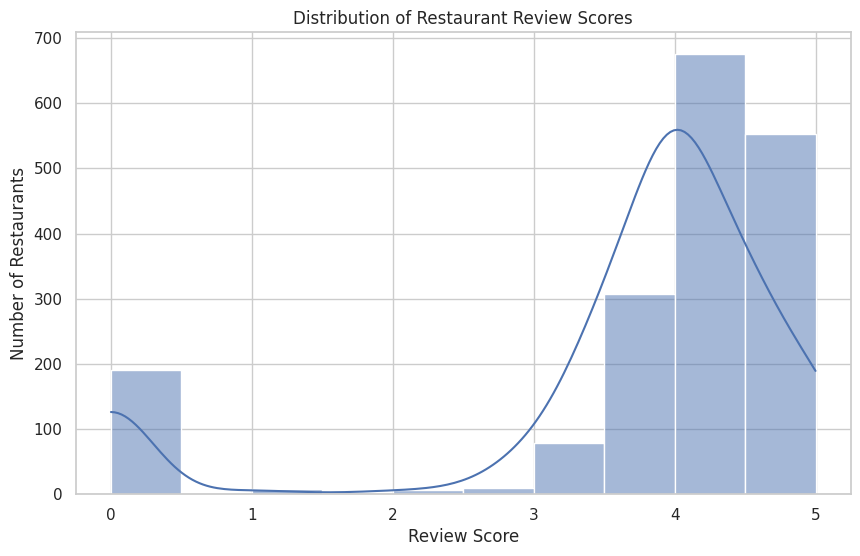

In [ ]:
sns.set(style="whitegrid")

# 1. Distribution of Review Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_viz['review_score'], bins=10, kde=True)
plt.title('Distribution of Restaurant Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Number of Restaurants')
plt.show()


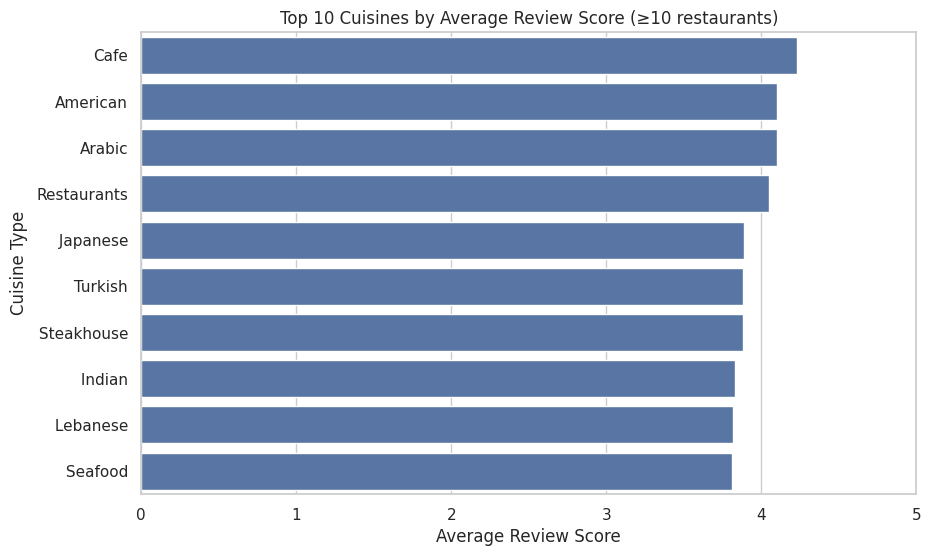

In [ ]:
# 2. Top Cuisines by Average Review Score
top_cuisines = df_viz.groupby('food_type1').agg({
    'review_score': ['mean', 'count']
})
top_cuisines.columns = ['avg_score', 'count']
top_cuisines = top_cuisines[top_cuisines['count'] >= 10].sort_values(by='avg_score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_cuisines['avg_score'], y=top_cuisines.index)
plt.title('Top 10 Cuisines by Average Review Score (≥10 restaurants)')
plt.xlabel('Average Review Score')
plt.ylabel('Cuisine Type')
plt.xlim(0, 5)
plt.show()


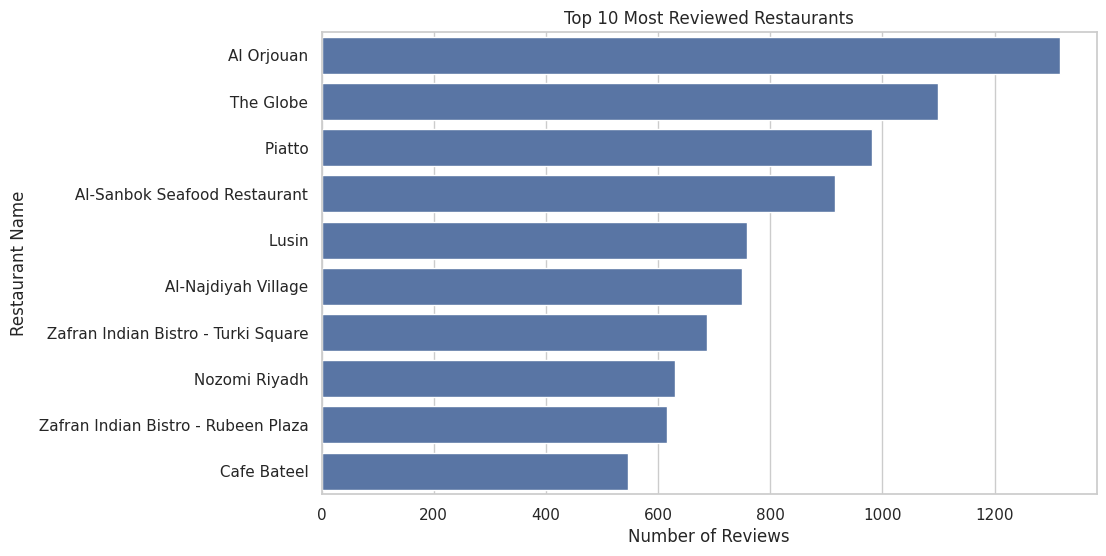

In [ ]:
# 3. Most Reviewed Restaurants
top_reviewed = df_viz.sort_values(by='number_of_reviews', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_reviewed['number_of_reviews'], y=top_reviewed['restaurant_name'])
plt.title('Top 10 Most Reviewed Restaurants')
plt.xlabel('Number of Reviews')
plt.ylabel('Restaurant Name')
plt.show()


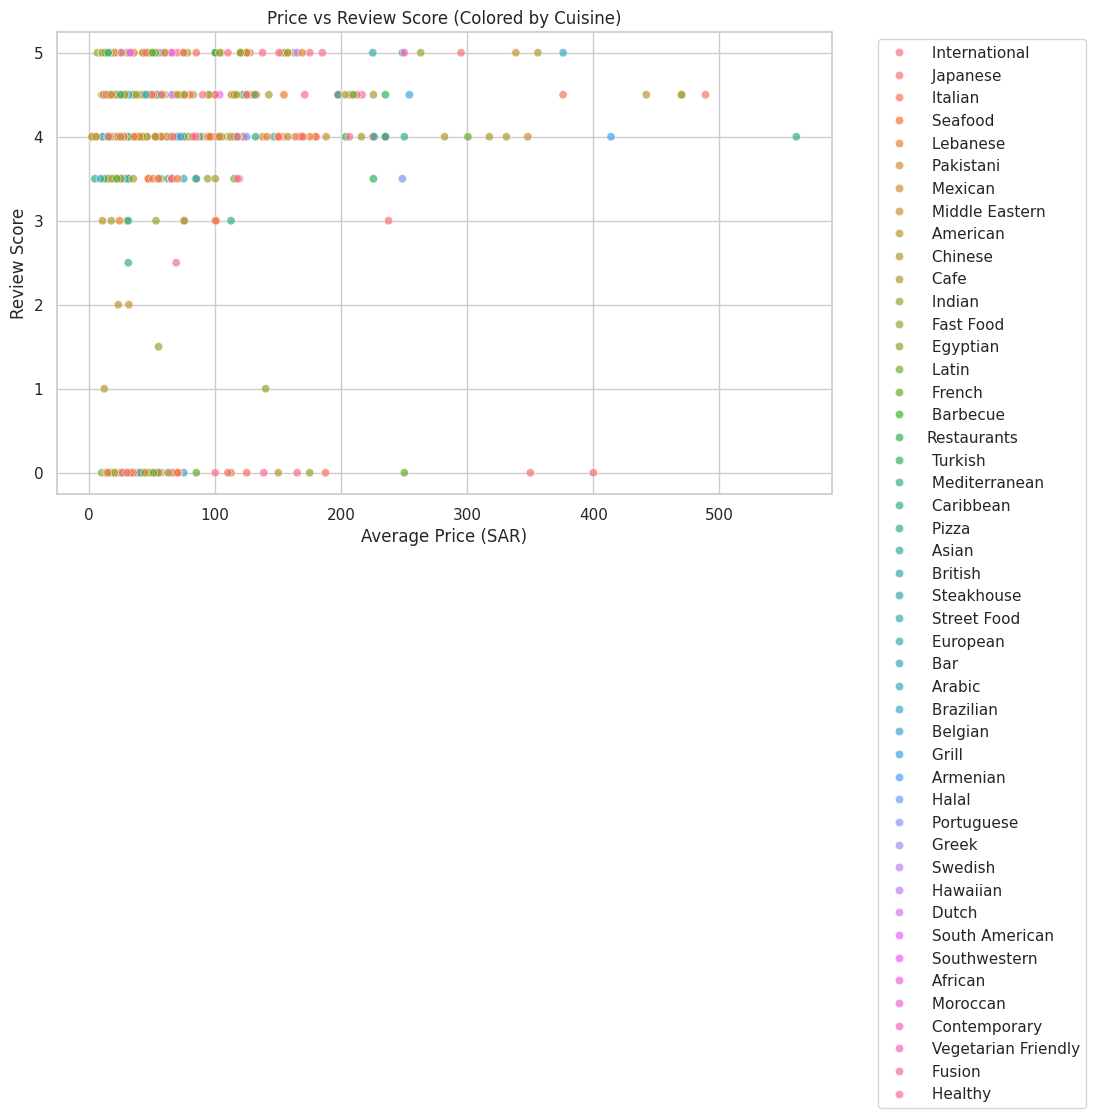

In [ ]:
# 4. Price vs Review Score Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz[df_viz['price_avg'].notnull()],
                x='price_avg', y='review_score', hue='food_type1', alpha=0.7)
plt.title('Price vs Review Score (Colored by Cuisine)')
plt.xlabel('Average Price (SAR)')
plt.ylabel('Review Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()